### INTRODUCTION

#### Predicting the quality of wine mainly through logistic regression
#### Wine quality was classified into two categories  good(0) and bad(1)
#### Steps taken in preprocessing includes Data cleaning, Outliers Removal, Standardization etc

### SIDE NOTE
#### You can leave your question about any unclear part in the comment section
#### Any correction will be highly welcomed

### LOADING THE DATASET

In [166]:
# Importing the neccesary libraries we are going to need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set()

In [167]:
path = 'C:\\Users\ABOLARIN BUKOLA\Documents\Data set\ml\winequality-red.csv'

df = pd.read_csv(path)

In [168]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### DEALING WITH MISSING VALUES 

In [169]:
df.info()
#From the result we see that the dataset is clean i.e no misssing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### DATA CLEANING

#### The first thing we will want to to do is categories our target variable that is 'quality' into 'good' or 'bad'. In this case if the quality is greater than 6.5  the quality is good value less or equal to 6.5 is represented as bad
#### NOTE that 'good' is represented by 1 while 'bad' by 0

In [170]:
grade = [] #Declaring a new list
for i in df['quality']: 
    if i > 6.5:
        i = 1
        grade.append(i)
    else:
        i = 0
        grade.append(i)
df['grade'] = grade # A new column to hold our already categoried quality 

In [171]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [172]:
df.drop('quality', axis = 1, inplace = True) #Dropping the quality column since we won't be needing it anymore

### OUTLIERS

####  plotting the distribution of our numerical variables will help us to detect outliers and any other abnormalities

In [173]:
df.describe() #shows description for only numerical variables

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,grade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


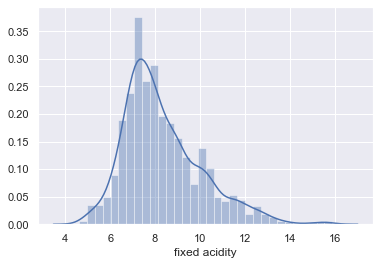

In [174]:
sns.distplot(df['fixed acidity']) #we can see those few outliers shown by the longer right tail of the distribution

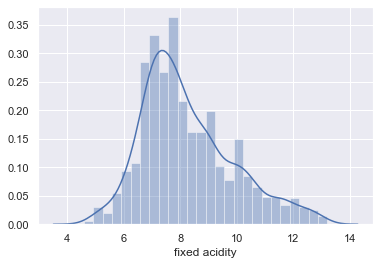

In [175]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['fixed acidity'].quantile(0.99)
df = df[df['fixed acidity'] < q]

sns.distplot(df['fixed acidity'])

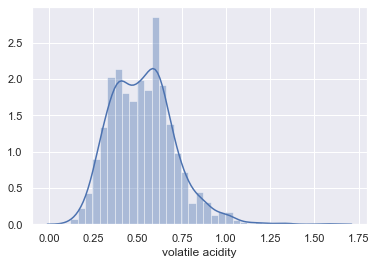

In [176]:
sns.distplot(df['volatile acidity']) #we can see those few outliers shown by the longer right tail of the distribution

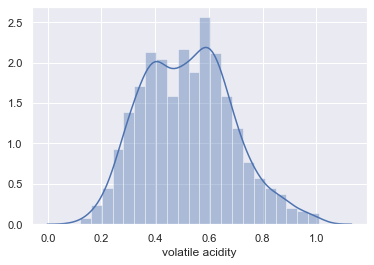

In [177]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['volatile acidity'].quantile(0.99)
df = df[df['volatile acidity'] < q]

sns.distplot(df['volatile acidity'])

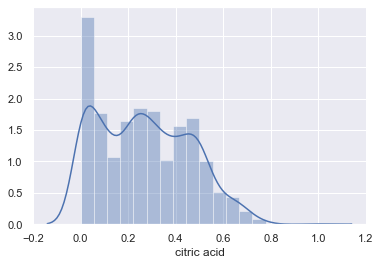

In [178]:
sns.distplot(df['citric acid']) #we can see those few outliers shown by the longer right tail of the distribution

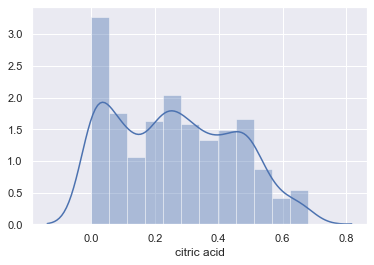

In [179]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['citric acid'].quantile(0.99)
df = df[df['citric acid'] < q]

sns.distplot(df['citric acid'])

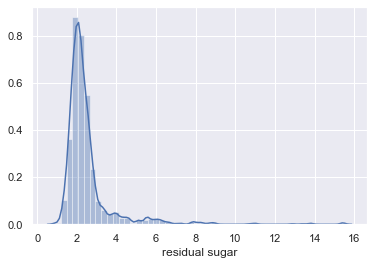

In [180]:
sns.distplot(df['residual sugar']) #we can see those few outliers shown by the longer right tail of the distribution

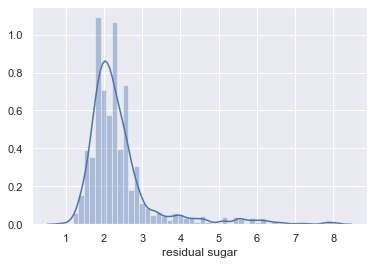

In [181]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['residual sugar'].quantile(0.99)
df = df[df['residual sugar'] < q]

sns.distplot(df['residual sugar'])

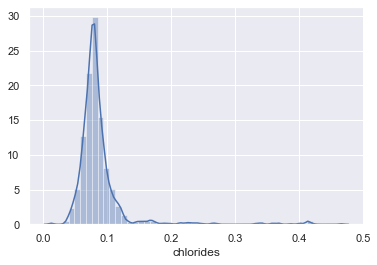

In [182]:
sns.distplot(df['chlorides']) #we can see those few outliers shown by the longer right tail of the distribution

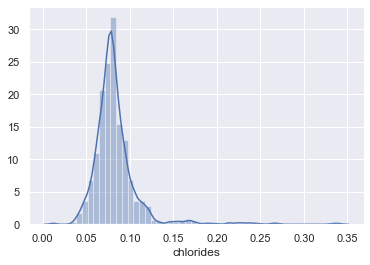

In [183]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['chlorides'].quantile(0.99)
df = df[df['chlorides'] < q]

sns.distplot(df['chlorides'])

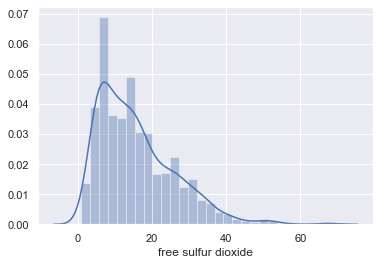

In [184]:
sns.distplot(df['free sulfur dioxide']) #we can see those few outliers shown by the longer right tail of the distribution

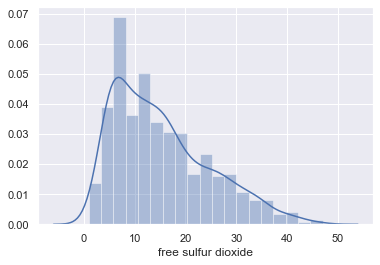

In [185]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['free sulfur dioxide'].quantile(0.99)
df = df[df['free sulfur dioxide'] < q]

sns.distplot(df['free sulfur dioxide'])

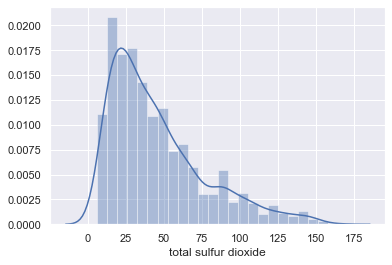

In [186]:
sns.distplot(df['total sulfur dioxide']) #we can see those few outliers shown by the longer right tail of the distribution

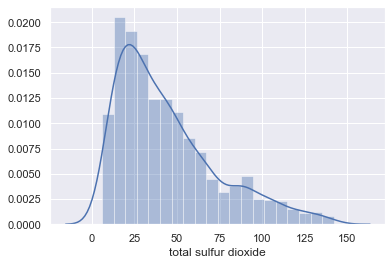

In [187]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['total sulfur dioxide'].quantile(0.99)
df = df[df['total sulfur dioxide'] < q]

sns.distplot(df['total sulfur dioxide'])

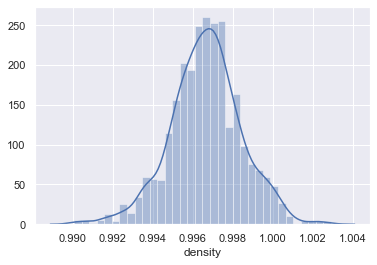

In [188]:
sns.distplot(df['density']) #we can see those few outliers shown by the longer left tail of the distribution

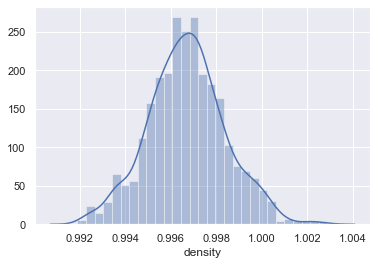

In [189]:
#Removing the bottom 1% of the observation will help us to deal with the outliers
q = df['density'].quantile(0.01)
df = df[df['density'] > q]

sns.distplot(df['density'])

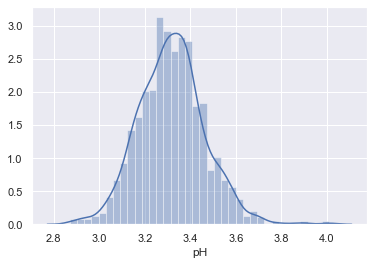

In [190]:
sns.distplot(df['pH']) #we can see those few outliers shown by the longer right tail of the distribution

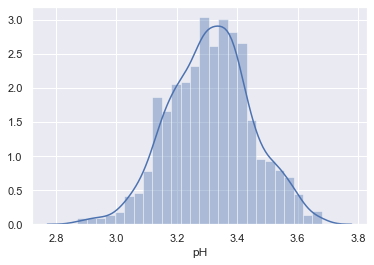

In [191]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['pH'].quantile(0.99)
df = df[df['pH'] < q]

sns.distplot(df['pH'])

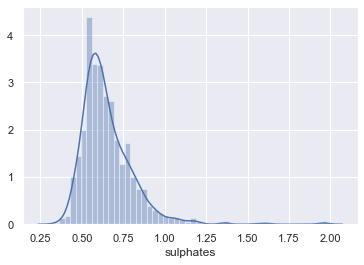

In [192]:
sns.distplot(df['sulphates']) #we can see those few outliers shown by the longer right tail of the distribution

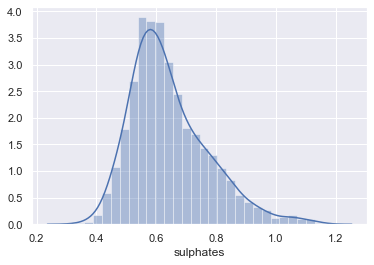

In [193]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['sulphates'].quantile(0.99)
df = df[df['sulphates'] < q]

sns.distplot(df['sulphates'])

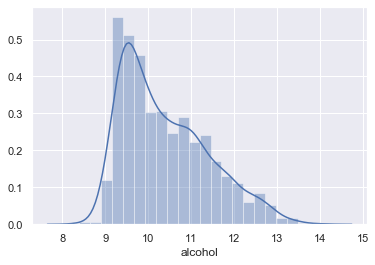

In [194]:
sns.distplot(df['alcohol']) #we can see those few outliers shown by the longer right tail of the distribution

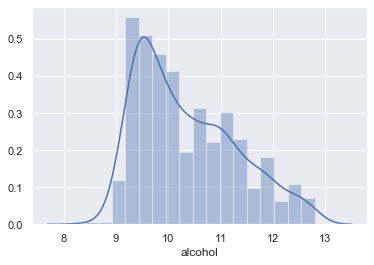

In [195]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = df['alcohol'].quantile(0.99)
df = df[df['alcohol'] < q]

sns.distplot(df['alcohol'])

### CHECKING OLS ASSUMPTIONS

#### Let's check that our dataset are not violating any of this assumptions which includes:
#### 1. No Endogeneity
#### 2. Normality and Homoscedasticity
#### 3.No Autocorrelation
#### 4.NO multicollinearity: making sure our independents variables are not strongly related(correlated) with each other

####  We are not violating  assumptions 1 through 3 but for NO multicollinearity we need to check

In [196]:
df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'grade'], dtype=object)

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# the target column (in this case 'grade') should not be included in variables
#Categorical variables already turned into dummy indicator may or maynot be added if any
variables = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]]
x = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif

#Using 10 as the minimum vif values i.e any independent variable 10 and above will have to be dropped
#From the results all independent variable are below 10

C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF,features
0,2.035942e+06,const
1,7.300577e+00,fixed acidity
2,1.959264e+00,volatile acidity
3,3.109611e+00,citric acid
4,1.607245e+00,residual sugar
5,1.146531e+00,chlorides
6,2.053044e+00,free sulfur dioxide
7,2.366855e+00,total sulfur dioxide
8,5.774604e+00,density
9,3.001377e+00,pH


### Standardization

#### Standardizing helps to give our independent varibles a more standard and relatable numeric scale, it also helps in improving model accuracy

In [198]:
#Declaring independent variable i.e x
#Declaring Target variable i.e y
x = df.drop('grade', axis =1 )
y = df['grade']

In [199]:
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

### LOGISTIC REGRESSION

In [200]:
#Splitting our data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2, random_state  = 365)

In [201]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
y_hat = reg.predict(x_test)

In [203]:
acc = metrics.accuracy_score(y_hat,y_test)
acc

0.9219858156028369

In [204]:
reg.intercept_

array([-2.91299645])

In [205]:
reg.coef_

array([[ 0.19786159, -0.46026528, -0.14582475,  0.33980691, -0.26247428,
         0.30194992, -0.91142349, -0.18491957, -0.18865915,  0.65939661,
         0.81551587]])

In [206]:
result = pd.DataFrame(data = x.columns, columns = ['Features'])
result['weight'] = np.transpose(reg.coef_)
result['odds'] = np.exp(np.transpose(reg.coef_))
result

,Features,weight,odds
0,fixed acidity,0.197862,1.218794
1,volatile acidity,-0.460265,0.631116
2,citric acid,-0.145825,0.864309
3,residual sugar,0.339807,1.404676
4,chlorides,-0.262474,0.769146
5,free sulfur dioxide,0.301950,1.352493
6,total sulfur dioxide,-0.911423,0.401952
7,density,-0.184920,0.831171
8,pH,-0.188659,0.828069
9,sulphates,0.659397,1.933625


#### Remember we standardized all independents variables so the odds values have no direct interpretation
#### Nevertheless using acohol as an example we can say for one standard deviation increase in acohol it is amost twice likely to cause a change in our target variable

### CONFUSION MATRIX

In [207]:
cm = confusion_matrix(y_hat,y_test)
cm

array([[250,  18],
       [  4,  10]], dtype=int64)

In [208]:
# Format for easier understanding
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,250,18
Actual 1,4,10


#### Our model predicted '0' correctly 250 times while predicting '0' incorrectly 18 times
#### Also it predicted  '1'  correctly 10 times while predicting '1' incorrectly 4 times

###  USING OTHER MODELS

In [209]:
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours

In [210]:
dd = DecisionTreeClassifier()
dd.fit(x_train,y_train)
y_1 = dd.predict(x_test)
acc_1 = metrics.accuracy_score(y_1,y_test)
acc_1

0.900709219858156

In [211]:
sv = svm.SVC() #select the algorithm
sv.fit(x_train,y_train) # we train the algorithm with the training data and the training output
y_2 = sv.predict(x_test) #now we pass the testing data to the trained algorithm
acc_2 = metrics.accuracy_score(y_2,y_test)
acc_2

C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9113475177304965

In [212]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
y_3 = knc.predict(x_test)
acc_3 = metrics.accuracy_score(y_3,y_test)
acc_3

0.8900709219858156

#### After comparison to some other models, LogisticRegression still gives us the highest (~92%)

#### If you find this notebook useful don't forget to upvote. #Happycoding